<a href="https://colab.research.google.com/github/mehular0ra/Pytorch-Tutorial/blob/main/Pytorch_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training ANN on MNIST dataset

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dataset = torchvision.datasets.MNIST(
    root= '.',
    train=True, 
    transform=transforms.ToTensor(),
    download = True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [5]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [7]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=False
)

In [8]:
test_dataset.data.shape

torch.Size([60000, 28, 28])

In [9]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [11]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [13]:
# data loader
# atomatically shuffles the data
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle=True)

In [14]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size, 
                                          shuffle = False)

In [19]:
n_epochs = 10

# saving the train and test losses
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        # move to GPU
        inputs, targets = inputs.to(device), targets.to(device)

        # reshape the input
        inputs = inputs.reshape(-1, 784)

        # zero the gradient parameters
        optimizer.zero_grad()

        # forward
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # backward
        loss.backward()
        optimizer.step()

        # appending the batch loss, to the iteration loss
        train_loss.append(loss.item())

    # appending the mean loss of the compelete epoch 
    train_losses[it] = np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_loader: 
        # move to gpu
        inputs, targets = inputs.to(device), targets.to(device)

         # reshape the input
        inputs = inputs.reshape(-1, 784)

        # zero the gradient parameters
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    
    test_losses[it] = np.mean(test_loss)

    print(f"Iteration: {it+1}/{n_epochs}, train_loss: {train_losses[it]}, test_loss: {test_losses[it]}")

    

Iteration: 1/10, train_loss: 0.08922377917399285, test_loss: 0.07211302079633673
Iteration: 2/10, train_loss: 0.07437437335684546, test_loss: 0.06477897030922936
Iteration: 3/10, train_loss: 0.06306825783937725, test_loss: 0.05169681958091666
Iteration: 4/10, train_loss: 0.05270984993655799, test_loss: 0.044407681680159336
Iteration: 5/10, train_loss: 0.04519403469401287, test_loss: 0.035007489309000814
Iteration: 6/10, train_loss: 0.03864068347615188, test_loss: 0.03017374274851099
Iteration: 7/10, train_loss: 0.032811182252228704, test_loss: 0.02585330722170439
Iteration: 8/10, train_loss: 0.027943031200126353, test_loss: 0.022582439245032605
Iteration: 9/10, train_loss: 0.02463708625935606, test_loss: 0.018487638618393955
Iteration: 10/10, train_loss: 0.020513904965552155, test_loss: 0.018092245966104713


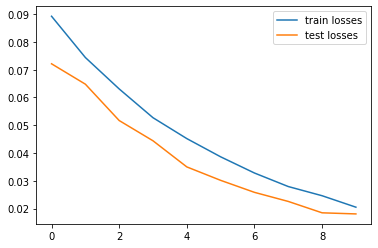

In [20]:
plt.plot(train_losses, label='train losses')
plt.plot(test_losses, label='test losses')
plt.legend()
plt.show()

### Doing some more testing

In [21]:
n_epochs = 10

# saving the train and test losses
train_losses_n = np.zeros(n_epochs)
test_losses_n = np.zeros(n_epochs)

for it in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        # move to GPU
        inputs, targets = inputs.to(device), targets.to(device)

        # reshape the input
        inputs = inputs.reshape(-1, 784)

        # zero the gradient parameters
        optimizer.zero_grad()

        # forward
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # backward
        loss.backward()
        optimizer.step()

        # appending the batch loss, to the iteration loss
        train_loss.append(loss.item())

    # appending the mean loss of the compelete epoch 
    train_losses_n[it] = np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_loader: 
        # move to gpu
        inputs, targets = inputs.to(device), targets.to(device)

         # reshape the input
        inputs = inputs.reshape(-1, 784)

        # zero the gradient parameters
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    
    test_losses_n[it] = np.mean(test_loss)

    print(f"Iteration: {it+1}/{n_epochs}, train_loss: {train_losses_n[it]}, test_loss: {test_losses_n[it]}")

    

Iteration: 1/10, train_loss: 0.018255360900108684, test_loss: 0.014168209255437679
Iteration: 2/10, train_loss: 0.016074417445159306, test_loss: 0.012852097189784653
Iteration: 3/10, train_loss: 0.013244357736243098, test_loss: 0.009039155994556836
Iteration: 4/10, train_loss: 0.011935611277806766, test_loss: 0.00909899454464568
Iteration: 5/10, train_loss: 0.009620890427164352, test_loss: 0.010246590518743605
Iteration: 6/10, train_loss: 0.007993782911179607, test_loss: 0.008657982018885456
Iteration: 7/10, train_loss: 0.007340628831862791, test_loss: 0.005030355219771939
Iteration: 8/10, train_loss: 0.00607847237735113, test_loss: 0.0070469890581394265
Iteration: 9/10, train_loss: 0.006310219561104288, test_loss: 0.004613820391186852
Iteration: 10/10, train_loss: 0.0044214498057568285, test_loss: 0.003299654342825147


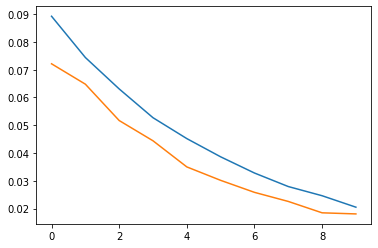

In [33]:
plt.plot(train_losses, label='train losses')
plt.plot(test_losses, label='test losses')


In [40]:
train_losses_f = np.concatenate((train_losses, train_losses_n))
test_losses_f = np.concatenate((test_losses, test_losses_n))


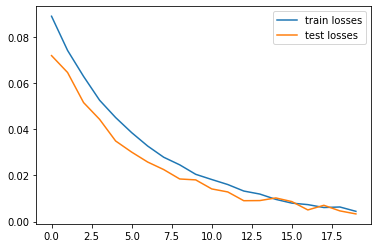

In [42]:
plt.plot(train_losses_f, label='train losses')
plt.plot(test_losses_f, label='test losses')
plt.legend()
plt.show()


In [45]:
# to get the accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    # put them in the gpu
    inputs, targets = inputs.to(device), targets.to(device)

    # reshape the inputs
    inputs = inputs.reshape(-1, 784)

    # forward 
    outputs = model(inputs)
    
    # get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += inputs.shape[0]
    
    # training accuracy
    train_acc = n_correct/n_total

for inputs, targets in test_loader:
    # put them in the gpu
    inputs, targets = inputs.to(device), targets.to(device)  

    # reshape the inputs
    inputs = inputs.reshape(-1, 784)

    # forward
    outputs = model(inputs)

    # get prediction
    _, predictions = torch.max(outputs, 1)

    # testing accuracy
    n_correct += (predictions == targets).sum().item()
    n_total += inputs.shape[0]
    test_acc = n_correct / n_total

print(f'Train accuracy: {train_acc}, Test accuracy: {test_acc}')

Train accuracy: 0.9995833333333334, Test accuracy: 0.9995833333333334
